# 50 Startups

#### "Predict which companies to invest for maximizing profit" (Regression task).


## Table of Contents

## Part 0 - Intro

### Overview

The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category” “Profit”.

Metadata

ID - startup ID

R&D Spend - how much each startup spends on Research and Development

Administration - how much they spend on Administration cost

Marketing Spend - how much they spend on Marketing

State - which state the startup is based in

Category - which business category the startup belong to

Profit - the profit made by the startup

## Goal - Predict which companies to invest for maximizing profit

## Part1 - Import & Load Data

### Import

In [1]:
# import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats

In [2]:
# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

### Load Data

In [3]:
# read data from csv files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# identify target
target = train['Profit']

## Part 2 - EDA - Exploratory Data Analysis

In [4]:
## Info

In [5]:
## Train dataset Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [6]:
## test dataset info
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


In [7]:
## Head

In [8]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [9]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


In [10]:
## Observation of target variable
train['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

C:\Roman\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

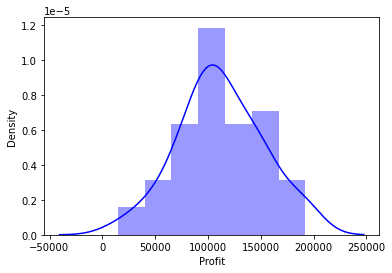

In [11]:
# visualisation of 'Profit' distribution
sns.distplot(train['Profit'], color = 'b')

In [12]:
# Set ID to Index
train = train.set_index('ID')
test = test.set_index('ID')

### Numerical and Categorical features #### List of Numerical and Categorical features

In [13]:
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats_train))
print()
print(train[numerical_feats_train].columns)

Quantity of Numerical features:  4

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


In [14]:
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats_train))
print()
print(train[categorical_feats_train].columns)

Quantity of Categorical features:  2

Index(['State', 'Category'], dtype='object')


### Missing Values

In [15]:
# check the Train features with missing values 
nan_columns = 0
for i in train.columns:
    if train[i].isnull().any():
        nan_columns = nan_columns +1
print("There are " + str(nan_columns) +" columns with NAN values for 50 rows.")
print()
print(train.isnull().sum())

There are 3 columns with NAN values for 50 rows.

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64


In [16]:
# check the Test features with missing values
nan_columns = 0
for i in test.columns:
    if test[i].isnull().any():
        nan_columns = nan_columns +1
print("There are " + str(nan_columns) +" columns with NAN values for 50 rows.")
print()
print(test.isnull().sum())

There are 3 columns with NAN values for 50 rows.

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64


### Filling missing values

#### Fields where NAN values have meaning.

Explaining in further depth:


'R&D Spend': Numerical - replacement of NAN by 'mean';

'Administration': Numerical - replacement of NAN by 'mean';

'Marketing Spend': Numerical - replacement of NAN by 'mean';

'State': Categorical - replacement of NAN by 'None';

'Category': Categorical - replacement of NAN by 'None'.

In [17]:
# Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = ['R&D Spend','Administration','Marketing Spend']
# replace 'NAN' with 'mean' in these columns
train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)

In [18]:
# Categorical NAN columns to fill in Train and Test datasets
na_columns_fill = ['State','Category']
# replace 'NAN' with 'None' in these columns
for col in na_columns_fill:
    train[col].fillna('None', inplace = True)
    test[col].fillna('None', inplace = True)

In [19]:
# check is there any mising values left in Train
train.isnull().sum().sum()

0

In [20]:
# check is there any mising values left in Test
test.isnull().sum().sum()

0

### Visualisation of Numerical features (regplot)

C:\Roman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Roman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Roman\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


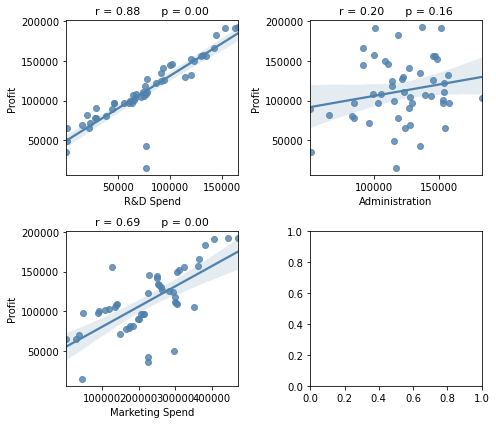

In [21]:
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats_train)
not_plot = ['Id',  'Profit']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(train[plot_num_feats[i]], train['Profit'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()
    

<AxesSubplot:xlabel='State', ylabel='Profit'>

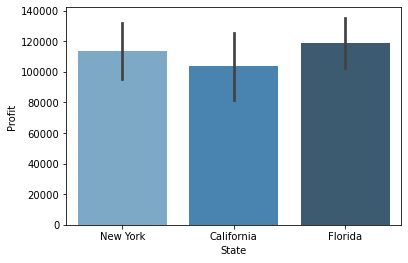

In [22]:
# profit split in State level
sns.barplot(x='State', y='Profit', data=train, palette = "Blues_d")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

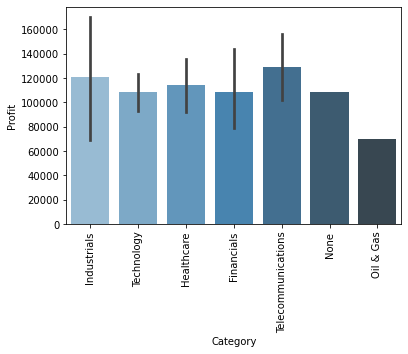

In [23]:
# profit split in Category level
sns.barplot(x='Category', y='Profit', data=train, palette = "Blues_d")
plt.xticks(rotation=90)

### One hot ecoding

In [24]:
# One-Hot Encoding Train dataset
train = pd.get_dummies(train, columns=['State', 'Category'])

In [25]:
# Drop target variable 
train = train.drop(columns = ['Profit'])

In [26]:
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0,0


In [27]:
train.shape

(50, 13)

In [28]:
# One Hot-Encoding Test dataset
test = pd.get_dummies(test, columns=['State', 'Category'])
test.shape

(50, 13)

In [29]:
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [30]:
# Drop unnecessary variables 
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

### StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train)
sc_test = sc.fit_transform(test)

In [32]:
sc_train = pd.DataFrame(sc_train)
sc_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.065354,0.560753,2.275193,-0.717741,-0.685994,1.393261,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884
1,2.001182,1.082807,2.018631,1.393261,-0.685994,-0.717741,-0.369274,-0.531085,-0.333333,-0.142857,1.128152,-0.294884
2,1.787635,-0.728257,1.687743,-0.717741,1.457738,-0.717741,-0.369274,1.882938,-0.333333,-0.142857,-0.886405,-0.294884
3,1.576120,-0.096365,1.460169,-0.717741,-0.685994,1.393261,2.708013,-0.531085,-0.333333,-0.142857,-0.886405,-0.294884
4,1.523293,-1.079919,1.303473,-0.717741,1.457738,-0.717741,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884


In [33]:
sc_test = pd.DataFrame(sc_test)
sc_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.065354,0.537398,2.207176,-0.717741,-0.654654,1.393261,-0.369274,-0.531085,3.000000,-0.142857,-0.922958,-0.294884
1,2.001182,1.098439,1.957976,1.393261,-0.654654,-0.717741,-0.369274,-0.531085,-0.333333,-0.142857,1.083473,-0.294884
2,1.787635,-0.847877,1.636584,-0.717741,1.527525,-0.717741,-0.369274,1.882938,-0.333333,-0.142857,-0.922958,-0.294884
3,1.576120,-0.168794,1.415541,-0.717741,-0.654654,1.393261,2.708013,-0.531085,-0.333333,-0.142857,-0.922958,-0.294884
4,1.523293,-1.225803,1.263342,-0.717741,1.527525,-0.717741,-0.369274,-0.531085,3.000000,-0.142857,-0.922958,-0.294884


### Creating datasets for ML part

In [60]:
# set 'X' for features of scaled Train dataset 'train'
X = train
# set 'y' for the target 'Profit'
y  = target
# 'X_Test' for features of scaled Test dataset 'test'
X_Test = test

### 'Train\Test' split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape

(35, 12)

In [62]:
X_test.shape

(15, 12)

## Part 4: Machine Learning.

### Build, train, evaluate and visualise models

#### Linear Regression

In [63]:
# Linear Regression model
LR = LinearRegression()
# Model Training
LR.fit(X_train,y_train)

LinearRegression()

In [64]:
# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [65]:
# Model R2 score
LRscore = LR.score(X_test,y_test)

In [66]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

In [67]:
LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.789688,11029.42834,2.030035e+08,14247.930908,0.019417,0.139346


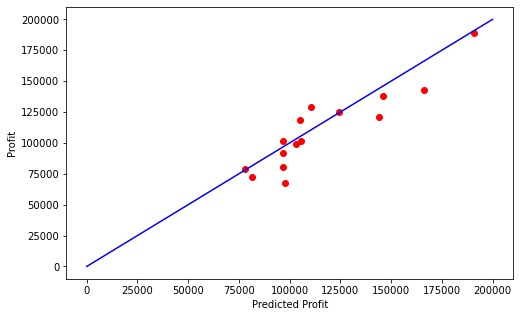

In [68]:
# visualisation of Train dataset predictions
# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [69]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1

array([173426.18101741, 189136.03555657, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [70]:
# Model Metrics
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.48225,2.756271e+08,16602.021239,0.077744,0.278826


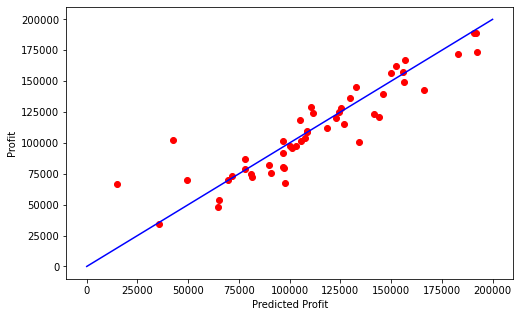

In [71]:

# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [72]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


#### Gradient Boosting Regressor

In [83]:
# Gradient Boosting Regressor model
GB=GradientBoostingRegressor(random_state=0)
# Model Training
GB.fit(X_train,y_train)

GradientBoostingRegressor(random_state=0)

In [84]:
# Model Prediction
GB_pred = GB.predict(X_test)
# Model R2 score
GBscore =GB.score(X_test, y_test)

In [85]:
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.871975,8794.067752,1.235755e+08,11116.451707,0.015324,0.123789


In [86]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)

In [87]:

# Model Metrics
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


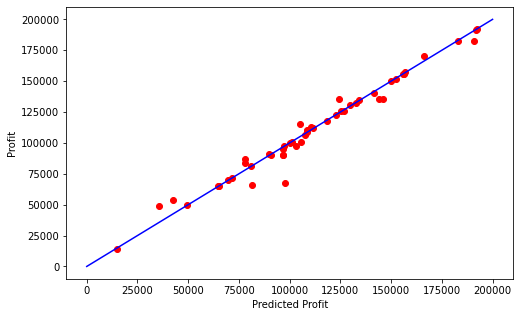

In [88]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

## Model comparison

In [89]:
# score comparison of models
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.482250,2.756271e+08,16602.021239,0.077744,0.278826
1,GradientBoostingRegressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


In [90]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192261.830000,173426.181017,191867.624129
1,191792.060000,189136.035557,191631.052384
2,191050.390000,188946.035741,182312.330201
3,182901.990000,172036.552176,182851.070198
4,166187.940000,142782.308756,170184.031177
5,156991.120000,167404.746140,156991.181748
6,156122.510000,149507.668697,156065.183378
7,155752.600000,157587.392262,155657.315655
8,152211.770000,161999.462058,152090.773106
9,149759.960000,156553.515380,150395.829435


#### 
Result: The best model is Gradient Boosting Regressor with R2 score = 0.972002.

## Conclusion.

In [91]:
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)

In [92]:
sub

,ID,Profit
0,0,191867.624129
1,1,191631.052384
2,2,182312.330201
3,3,182851.070198
4,4,170184.031177
5,5,156991.181748
6,6,156065.183378
7,7,155657.315655
8,8,152090.773106
9,9,150395.829435
